In [2]:
#Load the pandas library needed for dataframes
import pandas as pd

In [135]:
df = pd.read_csv("final project v11 Experiment 1-spreadsheet.csv", delimiter = ",", header = 6, low_memory = False)

In [136]:
df[:10]

,[run number],1,1.1,1.2,1.3,1.4,1.5,2,2.1,2.2,...,10799.2,10799.3,10799.4,10799.5,10800,10800.1,10800.2,10800.3,10800.4,10800.5
0,max-oil-demand,5,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
1,electricity-price-slider,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
2,percentage-port,10,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN
3,number-of-industries,10,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN
4,subsidiy-total,50,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,...,NaN,NaN,NaN,NaN,200,NaN,NaN,NaN,NaN,NaN
5,capacity-multiplicative,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
6,[steps],120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
7,[initial & final values],total-co2,total-stored-co2,total-emitted-co2,total-subsidy-port,total-subsidy-industries,total-electricity-use,total-co2,total-stored-co2,total-emitted-co2,...,total-emitted-co2,total-subsidy-port,total-subsidy-industries,total-electricity-use,total-co2,total-stored-co2,total-emitted-co2,total-subsidy-port,total-subsidy-industries,total-electricity-use
8,NaN,12003.199999999983,6383.34849202001,5619.851507979973,151.25,15.75,1166946.589455401,10454.399999999998,5568.445876570005,4885.954123429993,...,216120.20000000042,5445,8.899999999999984,6661577.639215955,200956.79999999967,3035,197921.79999999967,5445,8.499999999999986,6092310.728038532


In [137]:
df = df.T

In [138]:
df[:10]

,0,1,2,3,4,5,6,7,8
[run number],max-oil-demand,electricity-price-slider,percentage-port,number-of-industries,subsidiy-total,capacity-multiplicative,[steps],[initial & final values],NaN
1,5,1,10,10,50,1,120,total-co2,12003.199999999983
1.1,NaN,NaN,NaN,NaN,NaN,NaN,120,total-stored-co2,6383.34849202001
1.2,NaN,NaN,NaN,NaN,NaN,NaN,120,total-emitted-co2,5619.851507979973
1.3,NaN,NaN,NaN,NaN,NaN,NaN,120,total-subsidy-port,151.25
1.4,NaN,NaN,NaN,NaN,NaN,NaN,120,total-subsidy-industries,15.75
1.5,NaN,NaN,NaN,NaN,NaN,NaN,120,total-electricity-use,1166946.589455401
2,5,1,10,10,50,1,120,total-co2,10454.399999999998
2.1,NaN,NaN,NaN,NaN,NaN,NaN,120,total-stored-co2,5568.445876570005
2.2,NaN,NaN,NaN,NaN,NaN,NaN,120,total-emitted-co2,4885.954123429993


In [139]:
df.columns = ["max-oil-demand", "electricity-price-slider", "percentage-port", "number-of-industries", "subsidy-total", "capacity-multiplicative", "steps", "criteria", "values"]

In [140]:
df = df.drop(["steps"], axis =1).iloc[1:][:]

In [149]:
df = df.fillna(method="ffill")
df["values"] = df["values"].astype("float")
df["max-oil-demand"] = df["max-oil-demand"].astype("float")
df["electricity-price-slider"] = df["electricity-price-slider"].astype("float")
df["percentage-port"] = df["percentage-port"].astype("float")
df["number-of-industries"] = df["number-of-industries"].astype("float")
df["subsidy-total"] = df["subsidy-total"].astype("float")

In [150]:
df_total_co2 = df[df.criteria == "total-co2"]
df_total_stored_co2 = df[df.criteria == "total-stored-co2"]
df_total_emitted_co2 = df[df.criteria == "total-emitted-co2"]
df_total_subsidy_port = df[df.criteria == "total-subsidy-port"]
df_total_subsidy_industries = df[df.criteria == "total-subsidy-industries"]
df_total_electricity_use = df[df.criteria == "total-electricity-use"]

Text(0.5,0,'Percentage of subsidy to the port (%)')

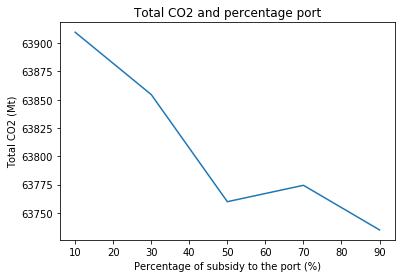

In [209]:
plot = df_total_co2.groupby(["percentage-port"])["values"].mean().plot(title = "Total CO2 and percentage port")

plot.set_ylabel("Total CO2 (Mt)")
plot.set_xlabel("Percentage of subsidy to the port (%)")

Text(0.5,0,'Total subsidy (M EUR)')

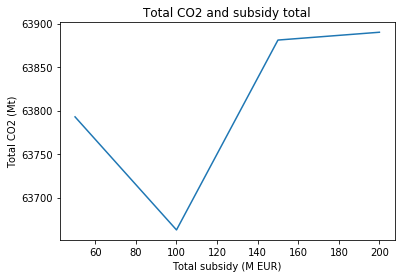

In [211]:
plot = df_total_co2.groupby(["subsidy-total"])["values"].mean().plot(title = "Total CO2 and subsidy total")

plot.set_ylabel("Total CO2 (Mt)")
plot.set_xlabel("Total subsidy (M EUR)")

Text(0.5,0,'Percentage of subsidy to the port (%)')

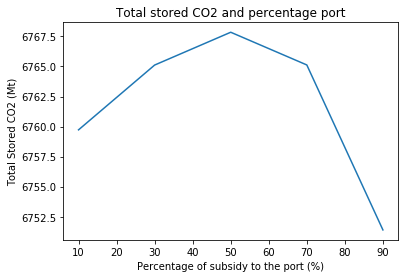

In [212]:
plot = df_total_stored_co2.groupby(["percentage-port"])["values"].mean().plot(title = "Total stored CO2 and percentage port")

plot.set_ylabel("Total Stored CO2 (Mt)")
plot.set_xlabel("Percentage of subsidy to the port (%)")

Text(0.5,0,'Total subsidy (M EUR)')

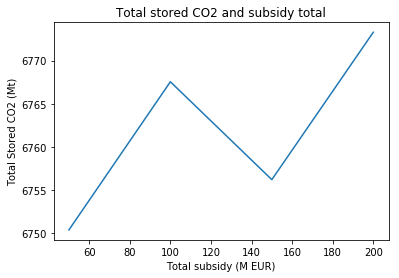

In [213]:
plot = df_total_stored_co2.groupby(["subsidy-total"])["values"].mean().plot(title = "Total stored CO2 and subsidy total")

plot.set_ylabel("Total Stored CO2 (Mt)")
plot.set_xlabel("Total subsidy (M EUR)")

Text(0.5,0,'Percentage of subsidy to the port (%)')

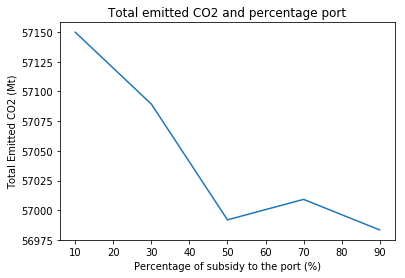

In [214]:
plot = df_total_emitted_co2.groupby(["percentage-port"])["values"].mean().plot(title = "Total emitted CO2 and percentage port")

plot.set_ylabel("Total Emitted CO2 (Mt)")
plot.set_xlabel("Percentage of subsidy to the port (%)")

Text(0.5,0,'Total subsidy (M EUR)')

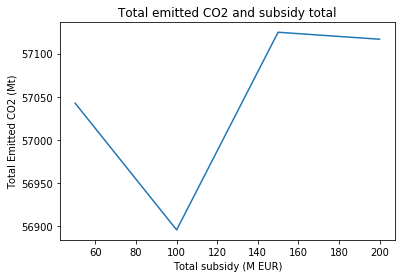

In [215]:
plot = df_total_emitted_co2.groupby(["subsidy-total"])["values"].mean().plot(title = "Total emitted CO2 and subsidy total")

plot.set_ylabel("Total Emitted CO2 (Mt)")
plot.set_xlabel("Total subsidy (M EUR)")

Text(0.5,0,'Percentage of subsidy to the port (%)')

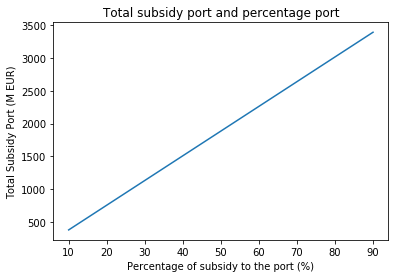

In [218]:
plot = df_total_subsidy_port.groupby(["percentage-port"])["values"].mean().plot(title = "Total subsidy port and percentage port")

plot.set_ylabel("Total Subsidy Port (M EUR)")
plot.set_xlabel("Percentage of subsidy to the port (%)")

Text(0.5,0,'Total subsidy (M EUR)')

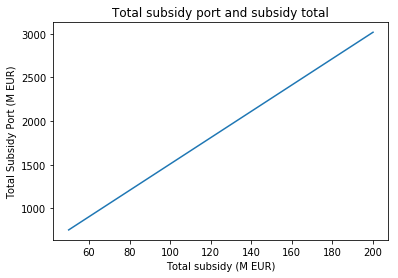

In [219]:
plot = df_total_subsidy_port.groupby(["subsidy-total"])["values"].mean().plot(title = "Total subsidy port and subsidy total")

plot.set_ylabel("Total Subsidy Port (M EUR)")
plot.set_xlabel("Total subsidy (M EUR)")

Text(0.5,0,'Percentage of subsidy to the port (%)')

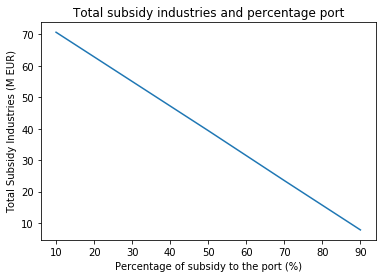

In [221]:
plot = df_total_subsidy_industries.groupby(["percentage-port"])["values"].mean().plot(title = "Total subsidy industries and percentage port")

plot.set_ylabel("Total Subsidy Industries (M EUR)")
plot.set_xlabel("Percentage of subsidy to the port (%)")

Text(0.5,0,'Total subsidy (M EUR)')

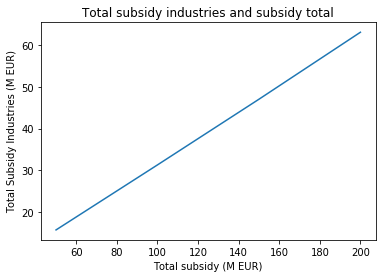

In [222]:
plot = df_total_subsidy_industries.groupby(["subsidy-total"])["values"].mean().plot(title = "Total subsidy industries and subsidy total")

plot.set_ylabel("Total Subsidy Industries (M EUR)")
plot.set_xlabel("Total subsidy (M EUR)")

Text(0.5,0,'Percentage of subsidy to the port (%)')

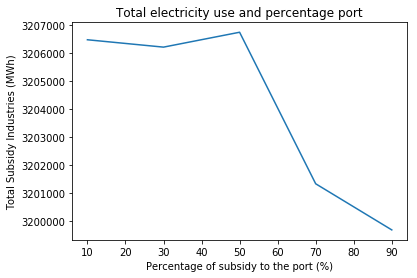

In [223]:
plot = df_total_electricity_use.groupby(["percentage-port"])["values"].mean().plot(title = "Total electricity use and percentage port")

plot.set_ylabel("Total Subsidy Industries (MWh)")
plot.set_xlabel("Percentage of subsidy to the port (%)")

Text(0.5,0,'Total subsidy (M EUR)')

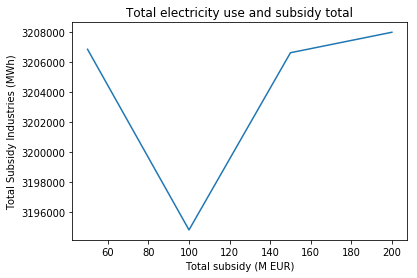

In [224]:
plot = df_total_electricity_use.groupby(["subsidy-total"])["values"].mean().plot(title = "Total electricity use and subsidy total")

plot.set_ylabel("Total Electricity Use (MWh)")
plot.set_xlabel("Total subsidy (M EUR)")